In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_cleaning import DataCleaning
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor, plot_importance

data_cleaner = DataCleaning(path="C:/Users/Admin/Documents/ML project/ml-project/data/train_airbnb_berlin.csv")
data_cleaner.data_cleaning(csv_name="train_airbnb_berlin_cleaned.csv")
df = data_cleaner.df

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15270 entries, 0 to 15269
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Host Since                        15270 non-null  float64
 1   Is Superhost                      15270 non-null  float64
 2   Latitude                          15270 non-null  float64
 3   Longitude                         15270 non-null  float64
 4   Is Exact Location                 15270 non-null  float64
 5   Accomodates                       15270 non-null  float64
 6   Bathrooms                         15270 non-null  float64
 7   Bedrooms                          15270 non-null  float64
 8   Beds                              15270 non-null  float64
 9   Guests Included                   15270 non-null  float64
 10  Min Nights                        15270 non-null  float64
 11  Reviews                           15270 non-null  float64
 12  Over

## Split dataset and Data analysis

In [3]:
train,test = train_test_split(df,random_state=0)

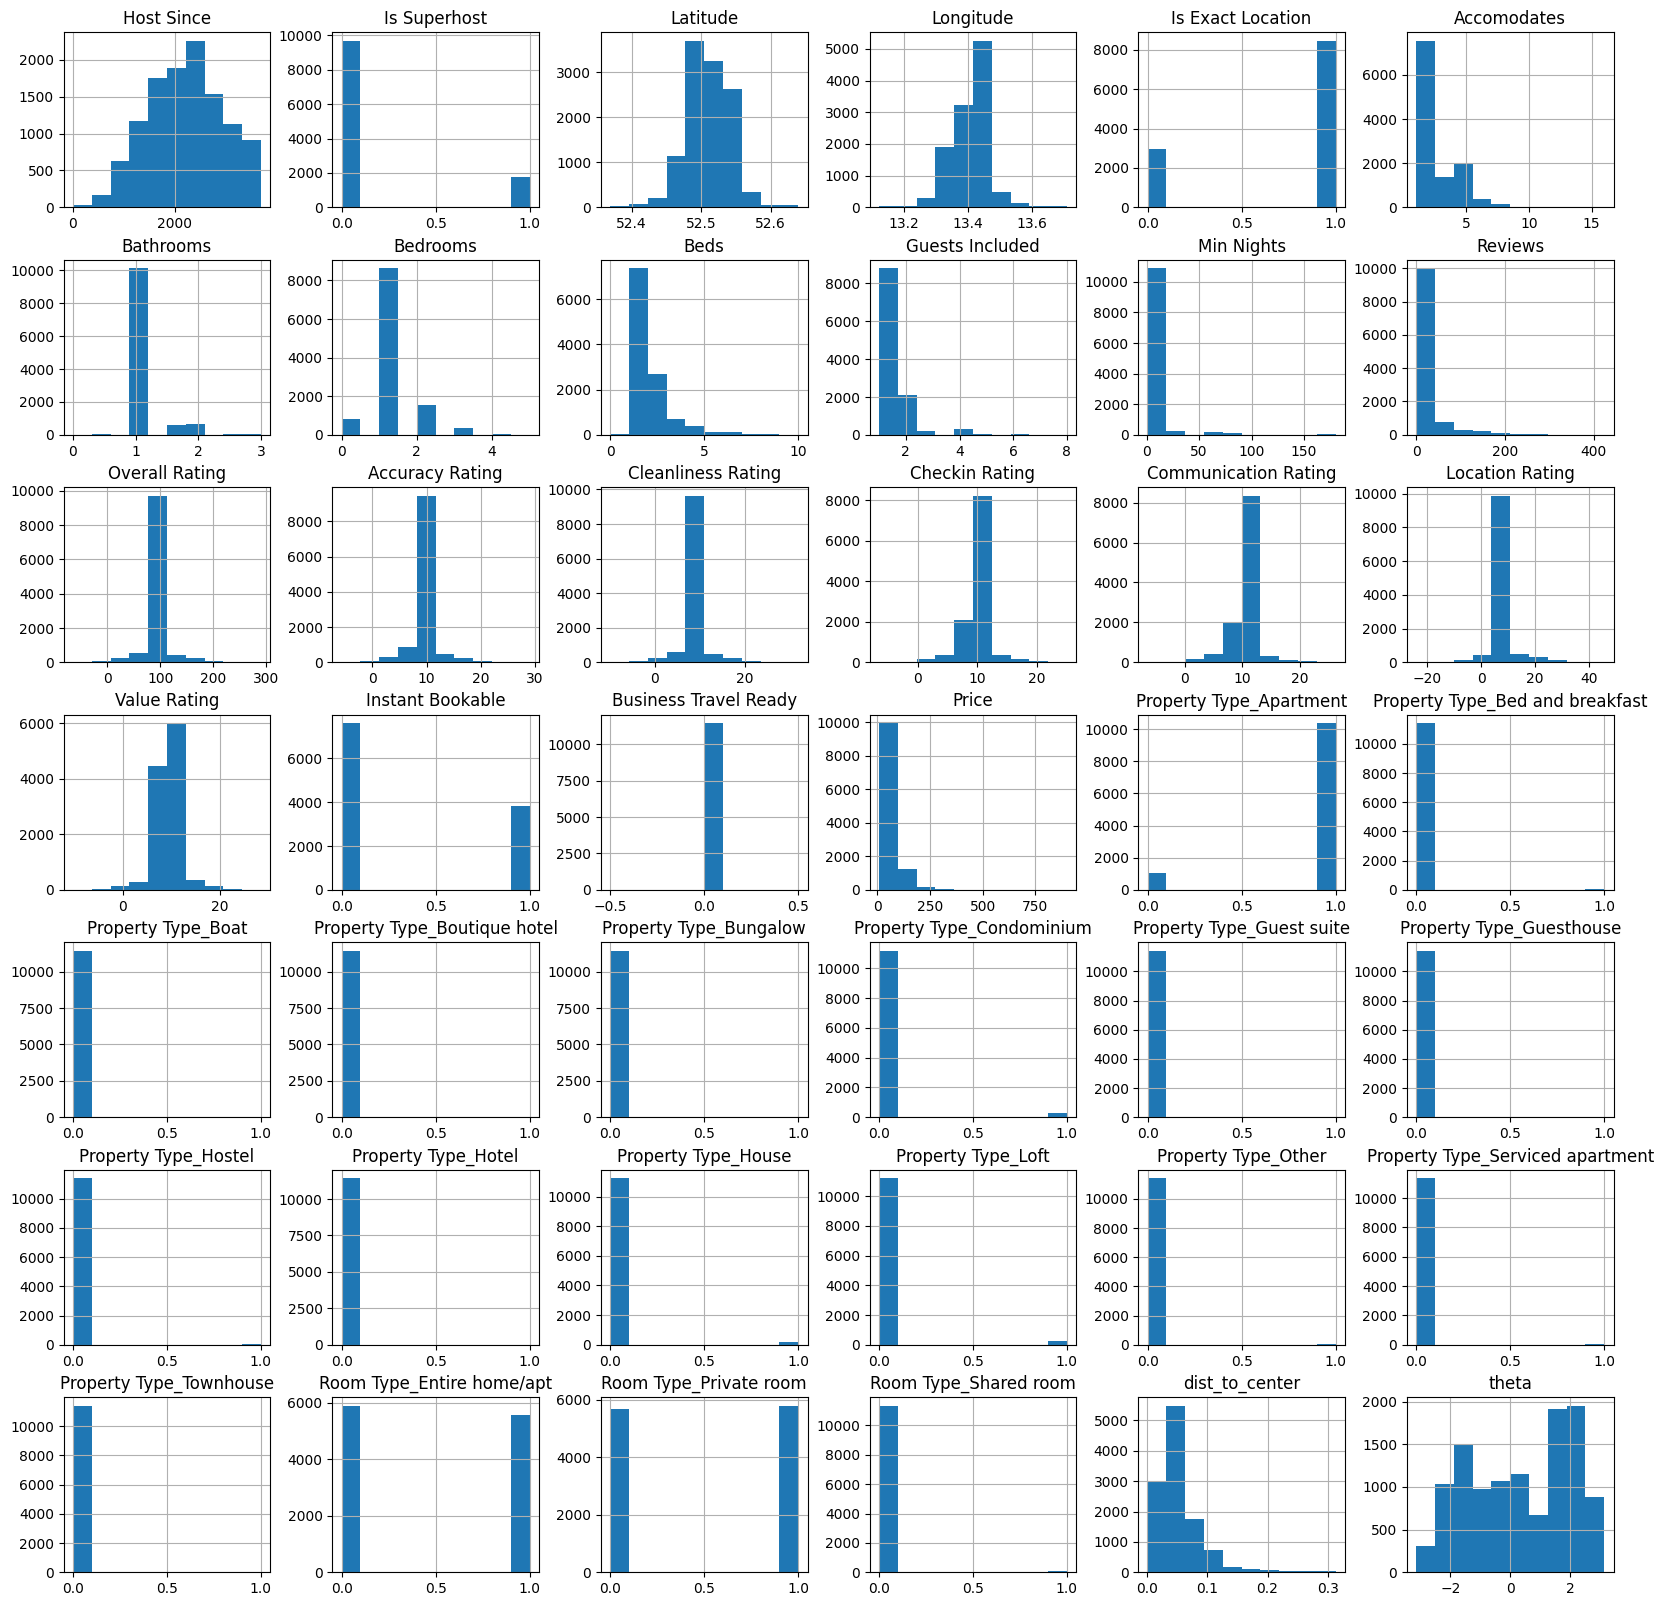

In [4]:
train.hist(figsize=(20,20))
plt.show()

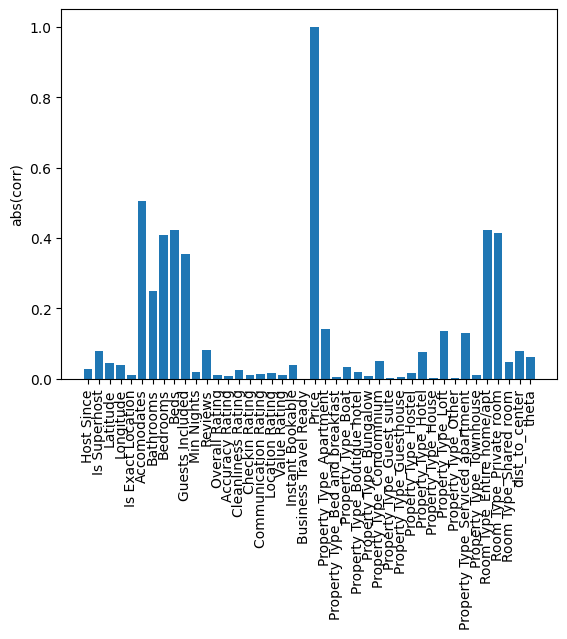

In [5]:
# Correlation with Price
plt.bar(train.columns,abs(train.corr()['Price']))
plt.xticks(rotation=90)
plt.ylabel('abs(corr)')
plt.show()

Text(0.5, 0, 'Price')

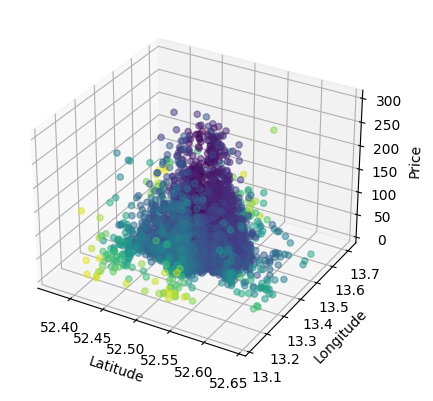

In [19]:
ax = plt.axes(projection ="3d")
draw = train[train['Price']<300]
ax.scatter3D(draw['Latitude'],draw['Longitude'],draw['Price'],
             c=draw['dist_to_center'],alpha=0.5)
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_zlabel('Price')

Text(0, 0.5, 'Price')

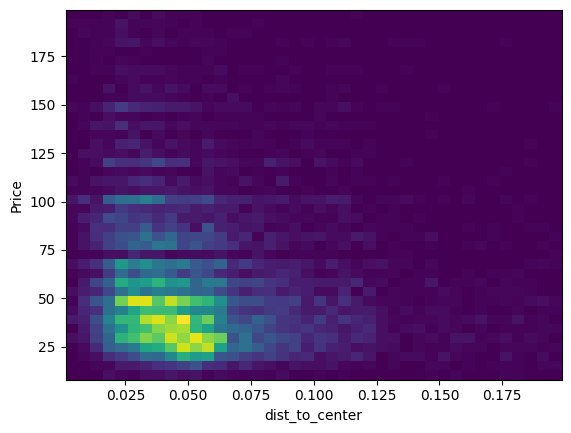

In [7]:
# 2D histogram
x= 'dist_to_center'
y = 'Price'
draw = train[(train[x]<0.20) & (train[y]<200)]
plt.hist2d(draw[x],draw[y],bins=  40,density=True)
plt.xlabel(x)
plt.ylabel(y)

# Select model and column

In [8]:
train,test = train_test_split(df,random_state=0)
L = ['Beds','Bathrooms','Bedrooms','Accomodates','Guests Included','Room Type_Entire home/apt']
X_train = train[L]
X_test = test[L]

model = GradientBoostingRegressor(n_estimators=1000, learning_rate=1,max_depth=20)
#model = XGBRegressor()
#model = KNeighborsRegressor()
model.fit(X_train,train['Price'])


GradientBoostingRegressor(learning_rate=1, max_depth=20, n_estimators=1000)

In [9]:
test['error'] = model.predict(X_test)-test['Price']
train['error'] = model.predict(X_train)-train['Price']

## Distrib error

Mean error :  22.978199596588972  euros
Relative mean error :  42.6195808428751 %
Quantile 1 :  -10.189374789349511  euros
Quantile 3 :  16.104477611940297  euros


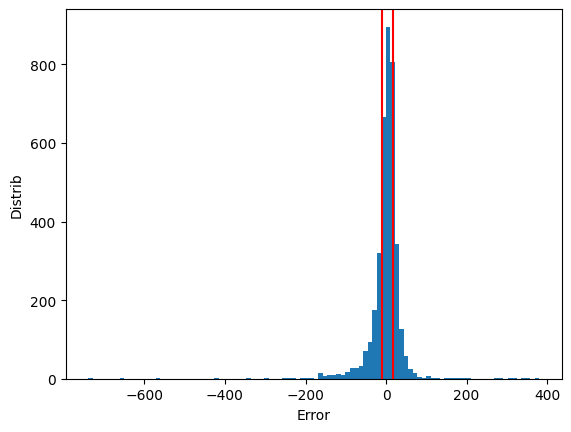

In [20]:
print('Mean error : ',np.mean(abs(test['error'])),' euros')
print('Relative mean error : ',np.mean(abs(test['error'])/test['Price'])*100,'%')
plt.hist(test['error'],bins=100)
Q = np.quantile(test['error'],[0.25,0.75])
plt.axvline(Q[0],color='r')
plt.axvline(Q[1],color='r')
plt.xlabel('Error')
plt.ylabel('Distrib')
print('Quantile 1 : ',Q[0],' euros')
print('Quantile 3 : ',Q[1],' euros')
plt.show()

Text(0, 0.5, 'Error')

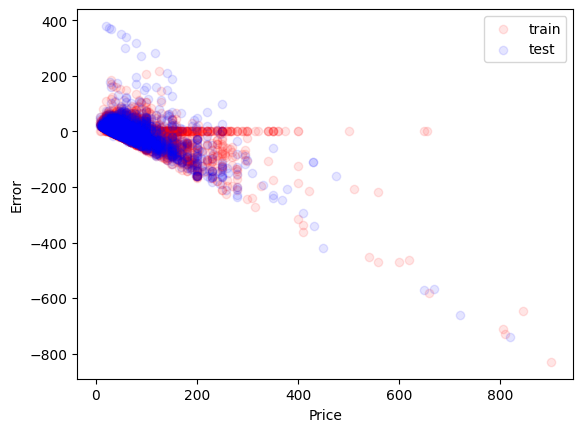

In [11]:
#Check error with y
y = 'Price'
plt.scatter(train[y],train['error'],color = 'r',alpha = 0.1,label='train')
plt.scatter(test[y],test['error'],color= 'b',alpha = 0.1,label='test')
plt.legend()
model.score(X_test,test[y])
plt.xlabel(y)
plt.ylabel('Error')

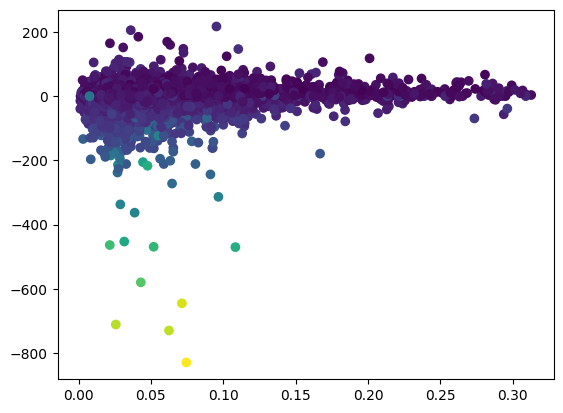

In [12]:
plt.scatter(train['dist_to_center'],train['error'],c=train['Price'])

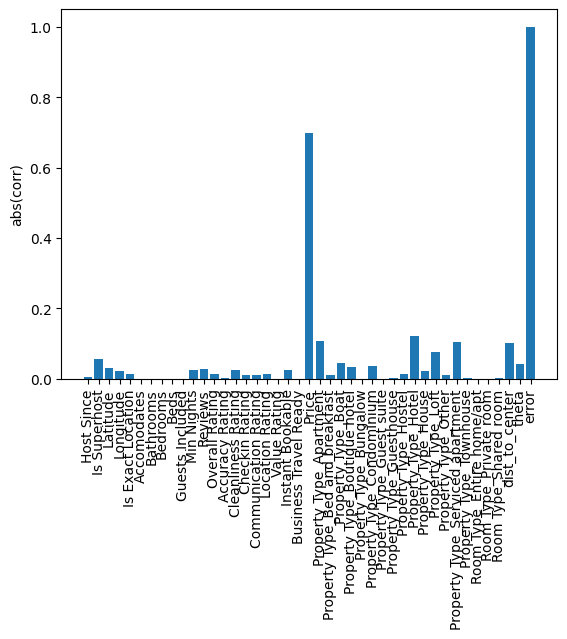

In [22]:
# Correlation with Price
plt.bar(train.columns,abs(train.corr()['error']))
plt.xticks(rotation=90)
plt.ylabel('abs(corr)')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

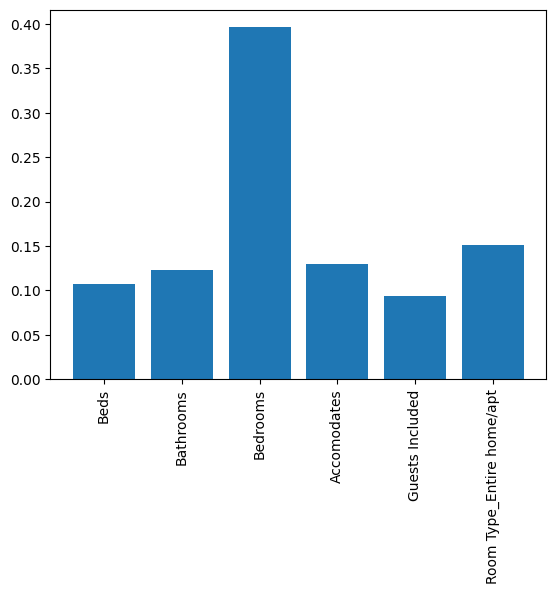

In [14]:
plt.bar(L,model.feature_importances_)
plt.xticks(rotation=90)

Text(0.5, 0, 'error')

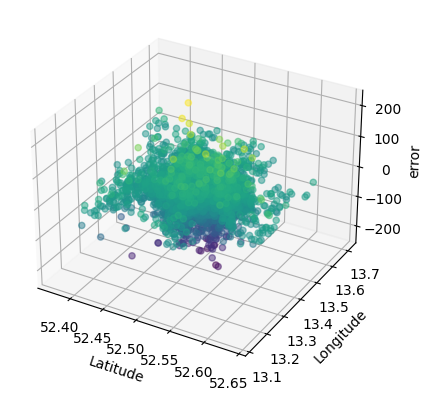

In [15]:
ax = plt.axes(projection ="3d")
draw = train[train['Price']<300]
ax.scatter3D(draw['Latitude'],draw['Longitude'],draw['error'],
             c=draw['error'],alpha=0.5)
#ax.plot([mean_Latitude,mean_Latitude],[mean_Longitude,mean_Longitude],[0,300],color='r')
ax.set_ylabel('Longitude')
ax.set_xlabel('Latitude')
ax.set_zlabel('error')